In [2]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image

# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor()])
#trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])
trainset = tv.datasets.MNIST(root='./data',  train=True,download=True,transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=300, shuffle=False, num_workers=10)
testset = tv.datasets.MNIST(root='./data', train=False, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=300, shuffle=False, num_workers=10)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid pote

In [3]:
import torch.nn.functional as F
import torch.nn as nn
from torch import Tensor
from torch.optim import Optimizer
from torch.nn.modules.loss import _Loss
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def display_image(ax,
    t: Tensor):
    n = t.detach().numpy()
    ax.imshow(n.reshape(28, 28))

def print_img(imgs:Tensor):
  t = imgs.detach().numpy()
  fig, ax = plt.subplots()
  ax.imshow(t.reshape(28, 28))

def print_image_2_2(img):
  img2 = Variable(img).cpu()
  image = img2
  fig, ax = plt.subplots()
  ax.imshow(image)

## input batch size image
def print_image(img):
  img2 = Variable(img).cpu()
  image = img2[0]
  fig, ax = plt.subplots()
  ax.imshow(image[0])

from random import randint
import random

def generator_img(dataloader):
  cnt = 0
  one_num = 0
  two_num = 0
  n_1 = random.randint(1, 299)
  n_2 = random.randint(1, 299)
  for data in dataloader:
    img, _ = data

    if cnt == n_1:
      one_num = img
      #print_img(img[0])

    if cnt == n_2:
      two_num = img
      #print_img(img[0])  
  
    if cnt == 299:
      return n_1, n_2
    cnt += 1
  return one_num, two_num


In [25]:
class Encoder(nn.Module):
  def __init__(self, hidden_dim: int = 28):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, 3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(16, hidden_dim, 3, stride=1, padding=1)
    self.dropout = nn.Dropout(0.25)

    
  
  def forward(self, x: Tensor) -> Tensor:
     x = self.conv1(x)
     x = F.relu(x)
     x = self.dropout(x)
     #print(f'conv1:{x.shape}')
     #x = self.conv2(x)
     #print(f'conv1:{x.shape}')
     #x = F.relu(x)
     x = self.conv3(x)
     #print(f'conv1:{x.shape}')
     return x
  def print_conv1(self, x):
    return (self.conv1(x))
  

In [50]:
class Decoder(nn.Module):
  def __init__(self, hidden_dim: int = 28):
    super(Decoder, self).__init__()
    #self.conv1 = nn.Conv2d(hidden_dim, 32, 3, stride=1, padding=1)
    #self.conv2 = nn.Conv2d(32, 1, 3, stride=1, padding=1)
    self.dropout = nn.Dropout(0.25)

    self.conv1 =  nn.ConvTranspose2d(hidden_dim, 16, 3, stride=1, padding=1)
    self.conv2 =  nn.ConvTranspose2d(16, 1, 3, stride=1, padding=1)



  def forward(self, x: Tensor) -> Tensor:
    x = self.conv1(x)
    x = F.relu(x)
    x = self.dropout(x)
    # = self.conv2(x)
    #x = F.relu(x)
    x = self.conv2(x)
    #x = F.softmax(x, dim=1)
    
    return x

In [31]:
class Autoencoders(nn.Module):

      def __init__(self, hidden_dim: int = 28):  
        super(Autoencoders, self).__init__()
        self.encoder = Encoder(hidden_dim)
        self.decoder = Decoder(hidden_dim)

      def forward(self, x: Tensor) -> Tensor:
        # Проход
        encoding = self.encoder(x)
        
        # Обратно идем
        x = self.decoder(encoding)
        return x
      def __str__(self):
        print(self.encoder)
        print(self.decoder)  


In [51]:
#model2 = Autoencoders(32)
#print(model2)
enc1 = Encoder(32)
print(enc1(torch.randn(1, 1, 28 , 28)).shape)

enc2 = Decoder(32)
print(enc2.conv1(torch.randn(1, 32, 28 , 28)).shape)
#print(enc2.conv1(torch.randn(1, 32, 28 , 28)).shape)
print(enc2(torch.randn(1, 32, 28 , 28)).shape)



torch.Size([1, 32, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 1, 28, 28])


In [37]:
def print_two_img(img1, img2):
  img1 = Variable(img1).cpu()
  img2 = Variable(img2).cpu()
  f, axarr = plt.subplots(1,2)
  axarr[0].imshow(img1[0][0])
  axarr[1].imshow(img2[0][0])
  axarr[0].set_title("Original image")
  axarr[1].set_title("Image reconstructed\nfrom autoencoder")

In [52]:
from collections import defaultdict
class TrainerAutoEncoder(object):

  def __init__(self, model, optim: Optimizer):
        
        self.model = model
        self.optim = optim
  
  def train_epoch(self, dataloader: DataLoader = None):
    
    #================== Train mode ====================#
    self.model = self.model.train()
    
    losses = []
    
    for img, labels in dataloader:
      
      #================== GPU =========================
      img = Variable(img).cuda()
      
      # ===================forward=====================
      
      output = self.model(img)
      loss = F.mse_loss(output, img)
      
      #====================From log ====================
      
      losses.append(loss.item())

      # ===================backward====================

      self.optim.zero_grad()    
      loss.backward()
      self.optim.step()

    print(f'Train loss {losses[-1]}')
    return losses[-1]

  
  def fit(self, dataloader: DataLoader = None, num_epochs = 2):
    
    history = defaultdict(list)
    best_accuracy = 0
    for epoch in range(num_epochs):

      print(f'Epoch {epoch + 1}/{num_epochs}')
      print('-' * 10)

      train_loss =  self.train_epoch(dataloader)

      history['train_loss'].append(train_loss)
      
    return model, history



In [58]:
model = Autoencoders(1).cuda()
train = TrainerAutoEncoder(model, optim.Adam(model.parameters()))
train.fit(dataloader, 5)
print("end")

Epoch 1/5
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.007476343773305416
Epoch 2/5
----------
Train loss 0.004666458815336227
Epoch 3/5
----------
Train loss 0.003672477090731263
Epoch 4/5
----------
Train loss 0.0031541630160063505
Epoch 5/5
----------
Train loss 0.002866205293685198
end


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


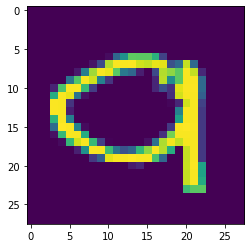

In [55]:
one_num, two_num = generator_img(dataloader)

one_num = Variable(one_num).cuda()
two_num = Variable(two_num).cuda()
print_image(one_num)

#print_transition_img_VAE(model, one_num, two_num, 20)

torch.Size([300, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


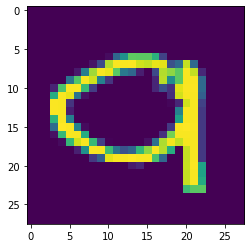

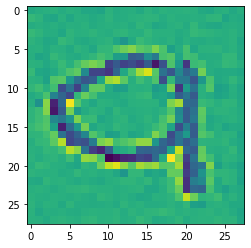

In [59]:
print_image(one_num)
masConv3 =  model.encoder.forward(one_num)

print(masConv3.shape)
print(masConv3[0].shape)
for i in masConv3[0]:
  print_image_2_2(i)
  print(i.shape)



torch.Size([300, 16, 28, 28])
torch.Size([16, 28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


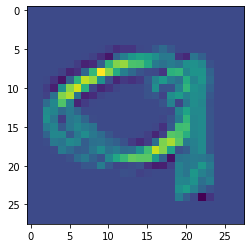

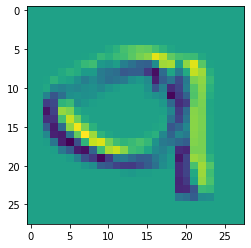

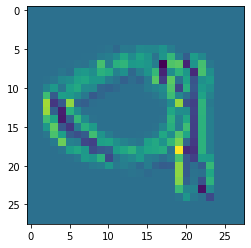

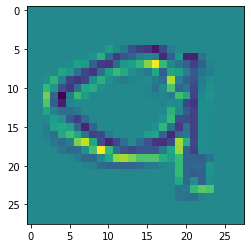

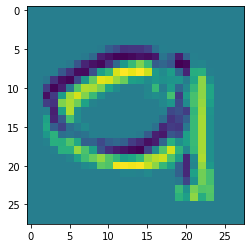

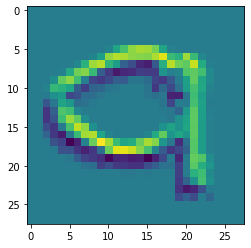

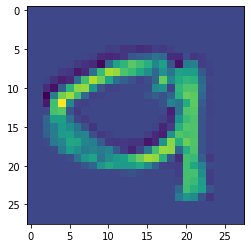

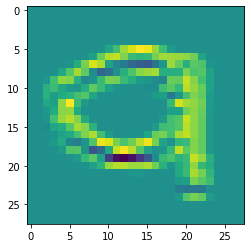

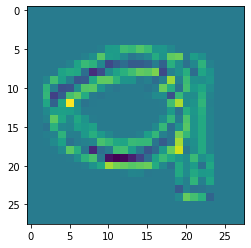

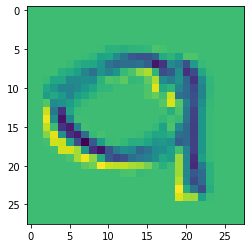

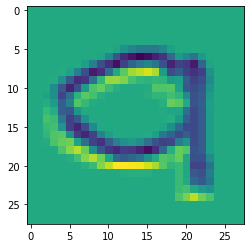

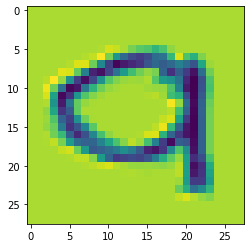

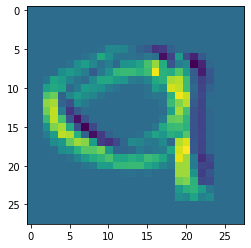

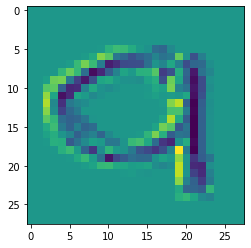

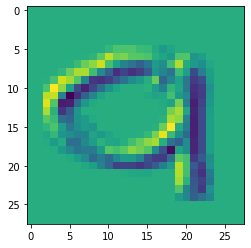

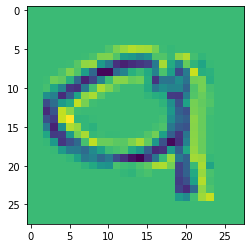

In [60]:
masConv1 = model.encoder.print_conv1(one_num)
print(masConv1.shape)
print(masConv1[0].shape)
for i in masConv1[0]:
  print_image_2_2(i)
  print(i.shape)
#for i in range(16):
#  print_image(masConv1[0])

In [20]:
def print_images_dataloader(model, dataloader, num = 10):
  cnt  = 0
  for data in dataloader:
    img, _ = data
    img = Variable(img).cuda()
    
    decoder = model(img)
    print_two_img(img, decoder)

    print((img - decoder).sum())
    cnt += 1
    if (cnt == num):
      break


In [21]:
def print_transition_img_VAE(model, img1, img2, steps = 20):
  
  print_two_img(img1, img2)

  enc_1 = model.encoder(img1)
  enc_2 = model.encoder(img2)
  
  """
  a * l + (1 - a) * l2
  """
  step = 1 / steps
  copy = enc_1
  for i in range(steps):
    copy = enc_1 * (i * step) + enc_2* (1 - i * step)
    imgs = model.decoder(copy)
    print_image(imgs)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(-33.7794, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-95.6113, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-7.4653, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-145.6708, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.6885, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-111.4053, device='cuda:0', grad_fn=<SumBackward0>)
tensor(10.5117, device='cuda:0', grad_fn=<SumBackward0>)
tensor(21.2192, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-23.2191, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-59.5767, device='cuda:0', grad_fn=<SumBackward0>)


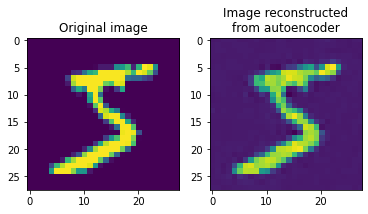

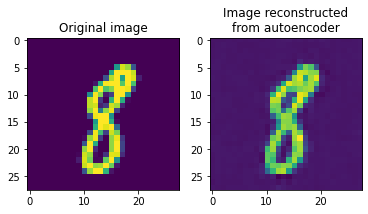

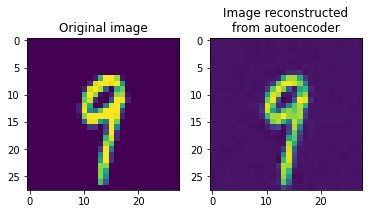

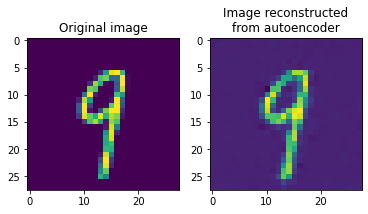

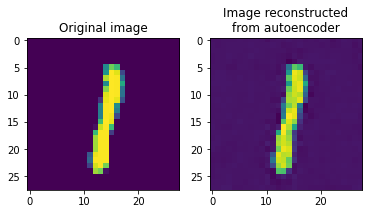

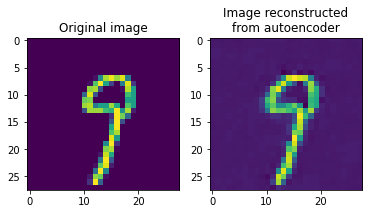

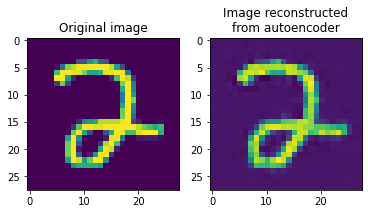

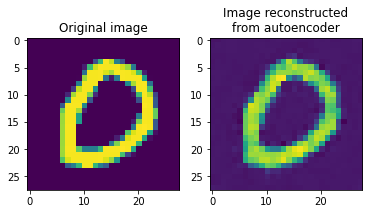

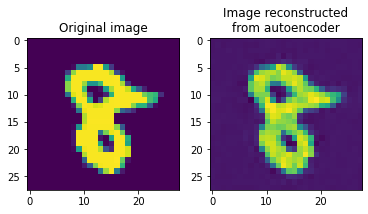

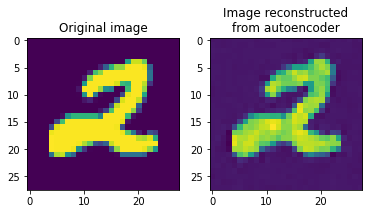

In [22]:
print_images_dataloader(model, dataloader, 10)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


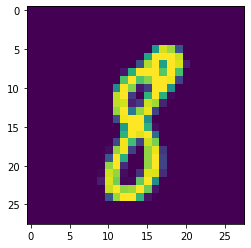

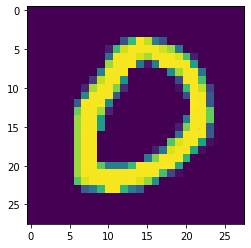

In [23]:
cnt = 0
one_num = 0
two_num = 0

for data in dataloader:
  # Batch_img (1)
  img, _ = data
  img = Variable(img).cpu()
  # ===================forward=====================
  #print(img[0])
  #print_img(img[0])
  if cnt == 1:
    one_num = img
    print_img(img[0])

  if cnt == 7:
    two_num = img
    print_img(img[0])  
  if cnt == 10:
    break
  cnt += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


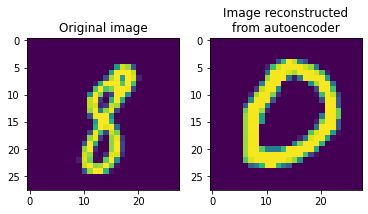

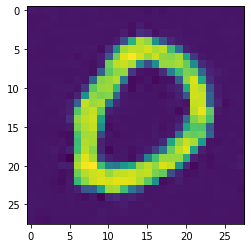

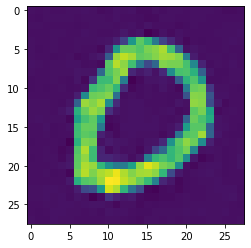

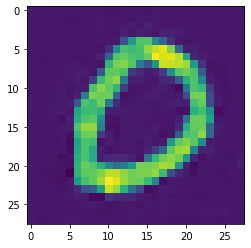

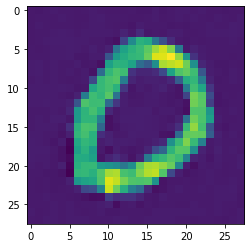

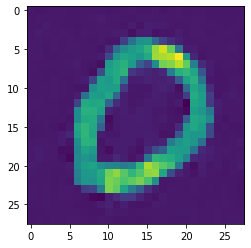

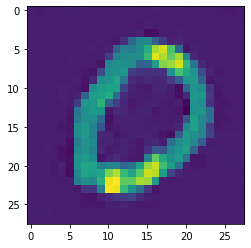

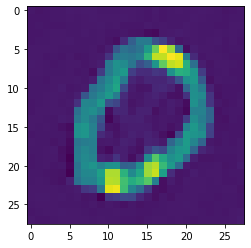

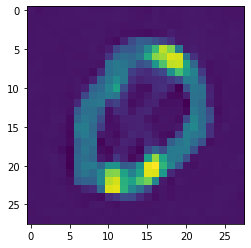

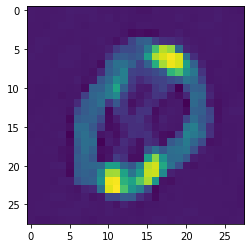

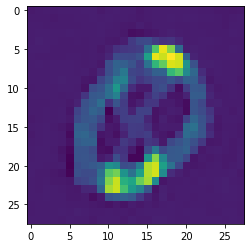

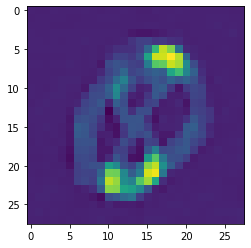

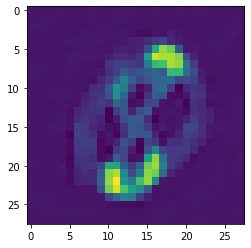

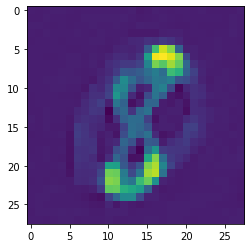

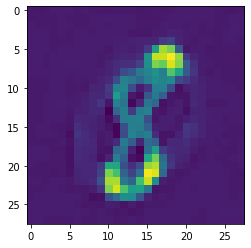

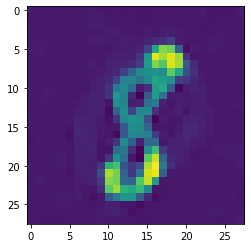

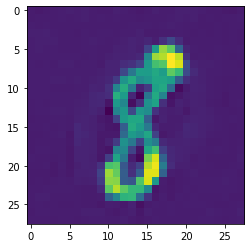

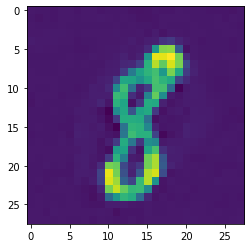

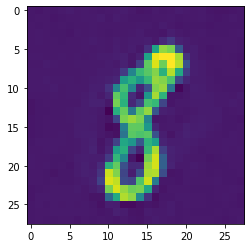

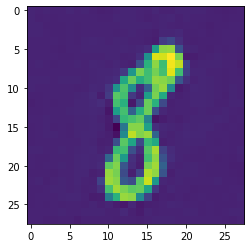

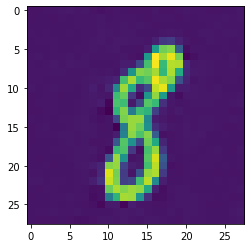

In [24]:
one_num = Variable(one_num).cuda()
two_num = Variable(two_num).cuda()
print_transition_img_VAE(model, one_num, two_num, 20)

In [ ]:
model2 = Autoencoders(10).cuda()
train = TrainerAutoEncoder(model2, optim.Adam(model.parameters()))
train.fit(dataloader, 1)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(-346.5956, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-392.3657, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-375.8420, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-449.3090, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-129.1648, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-452.7454, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-227.0298, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-371.2842, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-391.2722, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-329.4801, device='cuda:0', grad_fn=<SumBackward0>)


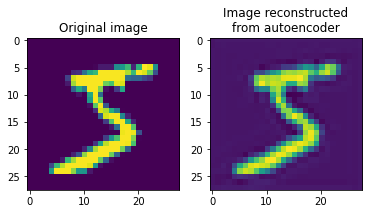

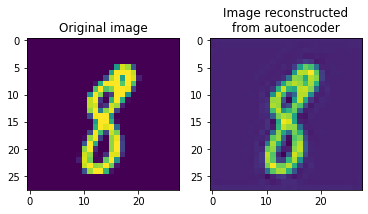

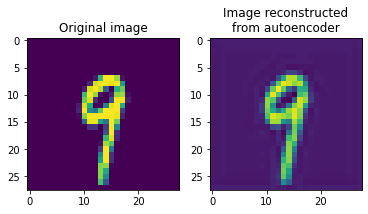

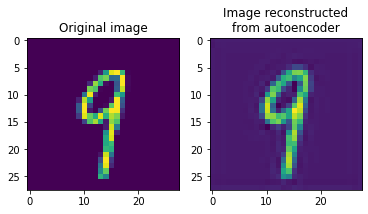

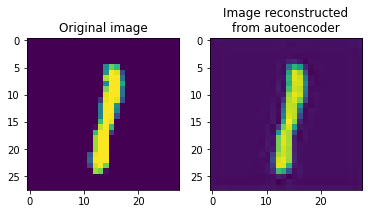

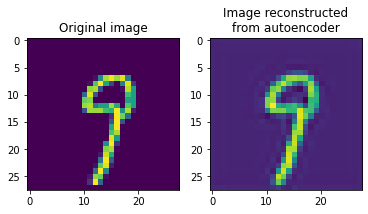

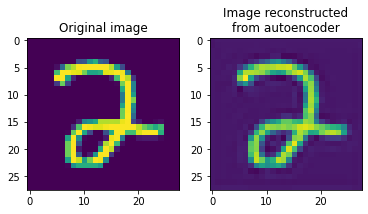

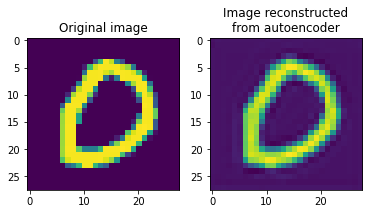

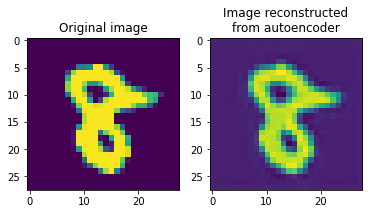

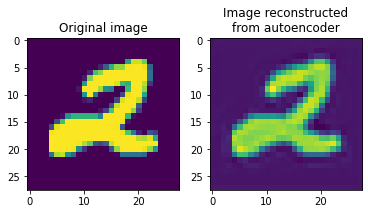

In [ ]:
print_images_dataloader(model, dataloader, 10)